# Your Uni : xh2604 and mm6712
# Your Full name : Xiyun Hu and Mathis Mallet
# Link to your Public Github repository with Final report  : https://github.com/MathisMallet/Advanced-Machine-Learning


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Get data in and set up X_train / X_test / y_train
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Get data in and set up X_train, X_test, y_train objects


Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [1]:
# Get training data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
import os


# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [2]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data\\X_train.csv') # Load train features to train on
X_test =  pd.read_csv("world_happiness_competition_data\\X_test.csv") # Load test features to predict on
y_train =  pd.read_csv("world_happiness_competition_data\\y_train.csv") # Load y train (true labels)
y_test =  pd.read_csv("world_happiness_competition_data\\y_test.csv") # Load y test (true labels)
y_train_labels = y_train.idxmax(axis=1) # Examine what this does and write in next cell
y_test_labels = y_test.idxmax(axis=1) # Complete in a similar manner as above

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111
1,Burundi,0.046,0.447,0.380,0.220,0.176,0.180,Burundi,Africa,Sub-Saharan Africa,155.000000
2,Belarus,1.067,1.465,0.789,0.235,0.094,0.142,Belarus,Europe,Eastern Europe,4.000000
3,Liberia,0.073,0.922,0.443,0.370,0.233,0.033,Liberia,Africa,Sub-Saharan Africa,1419.095238
4,Ecuador,0.912,1.312,0.868,0.498,0.126,0.087,Ecuador,Americas,Latin America and the Caribbean,5.000000


##  Add new data

In [3]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [4]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.

X_train = pd.merge(X_train, countrydata, left_on="Country or region", right_on="country_name", how='left') #We remove 6 countries without enough data
X_test = pd.merge(X_test, countrydata, left_on="Country or region", right_on="country_name", how='left')
X_train = X_train.drop(columns =["country_name"])
X_test = X_test.drop(columns =["country_name"])

In [5]:
X_train.head(1)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111,1949670.0,25.5,0.829862,74.342,15.97411,11.736418,22589.17355


# EDA

In [6]:
print(X_train.dtypes)

Country or region                 object
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
name                              object
region                            object
sub-region                        object
Terrorist_attacks                float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


**Find out the number and percentage of missing values in the table per column**

In [7]:
print("Training data missing values (%)")
print(X_train.isnull().sum()/(len(X_train))*100, "\n")
print("Testing data missing values (%)")
print(X_test.isnull().sum()/(len(X_test))*100)

Training data missing values (%)
Country or region                 0.000000
GDP per capita                    0.000000
Social support                    0.000000
Healthy life expectancy           0.000000
Freedom to make life choices      0.000000
Generosity                        0.000000
Perceptions of corruption         0.000000
name                              0.000000
region                            0.000000
sub-region                        0.000000
Terrorist_attacks                 0.000000
population                        8.695652
population_below_poverty_line    15.942029
hdi                               8.695652
life_expectancy                   8.695652
expected_years_of_schooling       8.695652
mean_years_of_schooling           8.695652
gni                               8.695652
dtype: float64 

Testing data missing values (%)
Country or region                 0.000000
GDP per capita                    0.000000
Social support                    0.000000
Healthy life ex

**Plot the frequency distribution / histogram of some of the numerical features that you think are important**

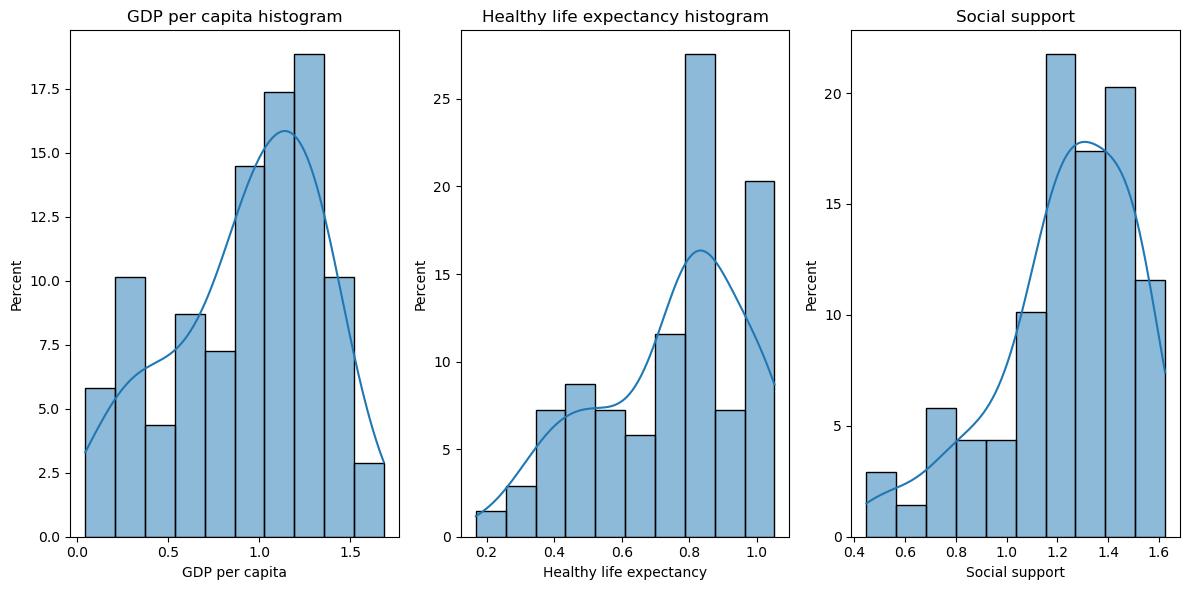

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure initialization
plt.figure(figsize=(12, 6))

# 'GDP per capita' histogram
plt.subplot(1, 3, 1)
sns.histplot(X_train["GDP per capita"], bins=10, kde=True, stat="percent")
plt.title("GDP per capita histogram")

# "Healthy life expectancy" histogram
plt.subplot(1, 3, 2)
sns.histplot(X_train["Healthy life expectancy"], bins=10, kde=True, stat="percent")
plt.title("Healthy life expectancy histogram")

# "Social support" histogram
plt.subplot(1, 3, 3)
sns.histplot(X_train['Social support'], bins=10, kde=True, stat="percent")
plt.title('Social support')

plt.tight_layout()
plt.show()

**Plot the categorical variables and their distribution**

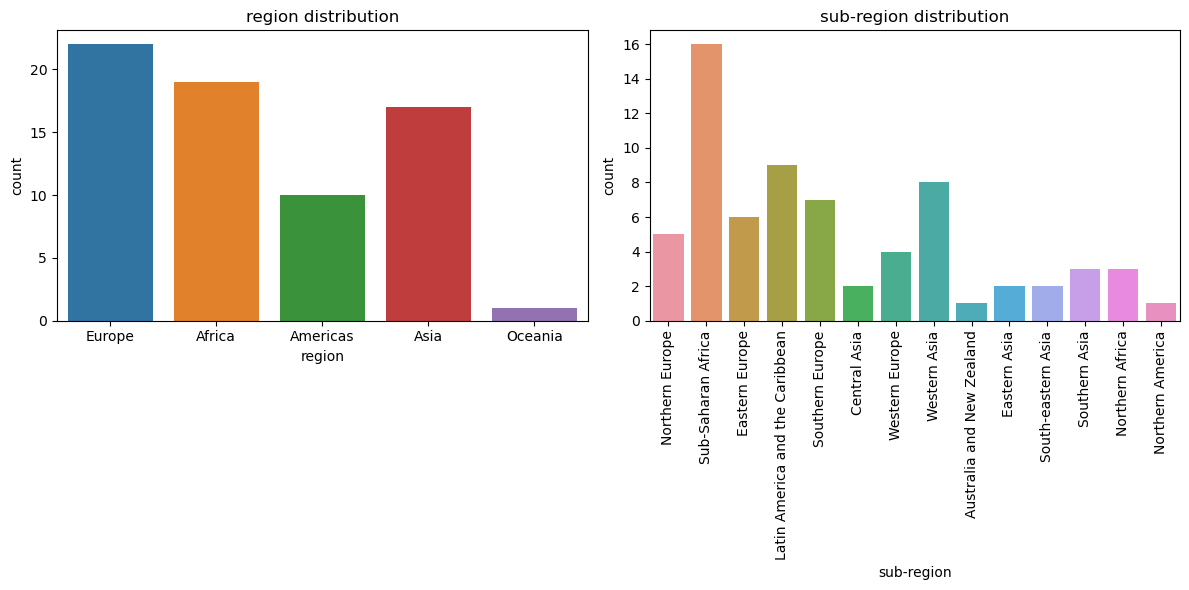

In [9]:
# figure initialization
plt.figure(figsize=(12, 6))

# "Social support" histogram
plt.subplot(1, 2, 1)
sns.countplot(x="region", data= X_train)
plt.title('region distribution')

# "sub-region" histogram
plt.subplot(1, 2, 2)
sns.countplot(x="sub-region", data= X_train)
plt.xticks(rotation=90)
plt.title('sub-region distribution')

plt.tight_layout()
plt.show()

**Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.**

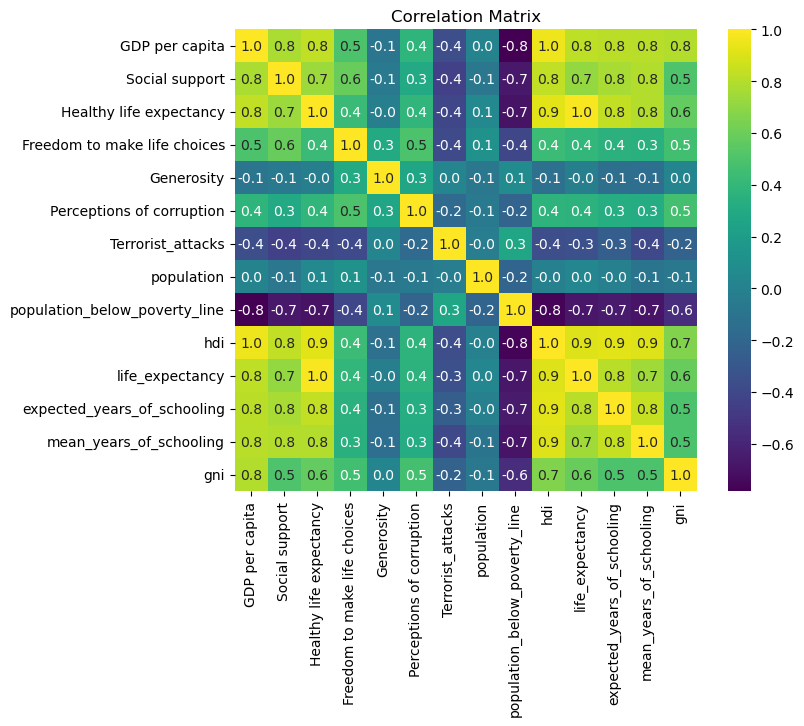

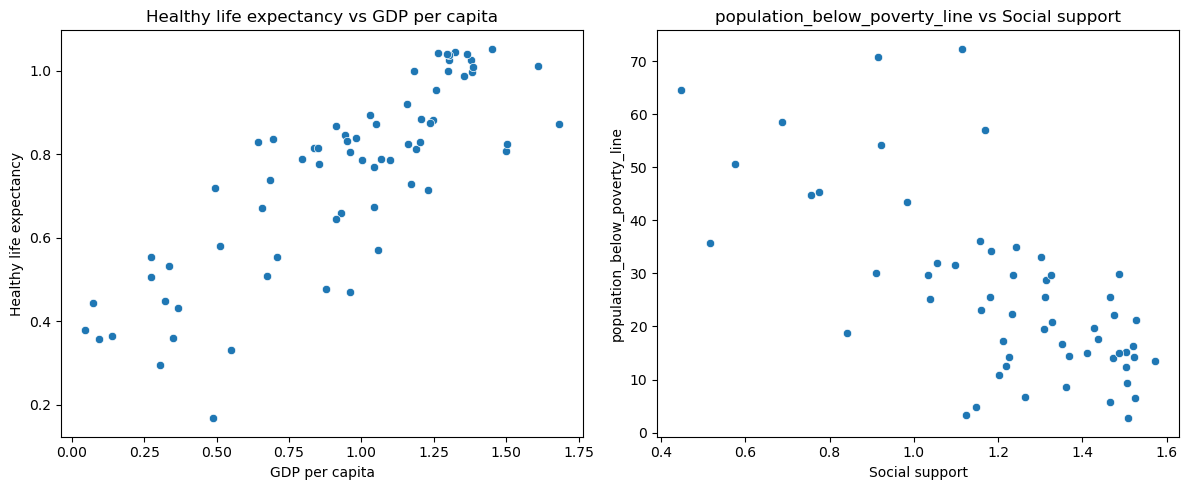

           GDP per capita  Social support  Healthy life expectancy  \
Happiness                                                            
Average          0.978231        1.238769                 0.817000   
High             1.111353        1.394176                 0.851706   
Low              0.764333        1.092417                 0.599583   
Very High        1.400385        1.479923                 0.985077   
Very Low         0.393071        0.910571                 0.464857   

           Freedom to make life choices  Generosity  \
Happiness                                             
Average                        0.305538    0.160231   
High                           0.409824    0.139941   
Low                            0.328083    0.144750   
Very High                      0.539000    0.250769   
Very Low                       0.248929    0.228357   

           Perceptions of corruption  Terrorist_attacks    population  \
Happiness                                         

In [10]:
#Correlation Matrix
X_train_num = X_train.select_dtypes(exclude=['object'])
correlation_matrix = X_train_num.corr()
#Ploting of the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='viridis', square=True)
plt.title('Correlation Matrix')
plt.show()

# Bivariate analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="GDP per capita", y="Healthy life expectancy", data= X_train_num)
plt.title("Healthy life expectancy vs GDP per capita")
plt.subplot(1, 2, 2)
sns.scatterplot(x="Social support", y="population_below_poverty_line", data= X_train_num)
plt.title("population_below_poverty_line vs Social support")

plt.tight_layout()
plt.show()

#Grouped analysis
X_train_temp = X_train_num
X_train_temp["Happiness"] = y_train_labels
grouped_means = X_train_temp.groupby("Happiness").mean()
print(grouped_means)

A good part of the variables seems well correlated, some are anticorelated too, but the "population" and "Generosity" variables aren't very correlated to the other variables. 

However we see that those two variables don't have the same mean value in the group analysis for different happiness values. Thus, it may be interesting to keep them as they are the lone conveyor of the information they carry.

**##2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function**


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(exclude=['object'])
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")), # we replace the missing value by the mean instead of 0 to avoid a huge bias by saying for example that the population is of 0 when the value is missing
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent')), #we replace the missing value by the most frequent value
    ('onehot', OneHotEncoder(handle_unknown= "ignore"  ))]) #we don't raise an error when we face an unknown category

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [12]:
# Write function to transform data with preprocessor
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [13]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(69, 33)

**##3. Fit model on preprocessed data and save preprocessor function and model**


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=10, random_state=46) #add random_state for reproductbility 

model.fit(preprocessor(X_train), y_train) #Fit the model

#Score the model
y_pred = model.predict(preprocessor(X_test))
accuracy = accuracy_score(y_test, y_pred) #https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
print(f"Accuracy of the model: {accuracy:.2f}")

# Your cell should have a score between 0-1 as output

Accuracy of the model: 0.21


## 4. Generate predictions from X_test data and compare it with true labels in Y_test.csv file


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.50      1.00      0.67         2
           4       0.67      0.50      0.57         4

   micro avg       0.44      0.21      0.29        19
   macro avg       0.23      0.30      0.25        19
weighted avg       0.19      0.21      0.19        19
 samples avg       0.21      0.21      0.21        19



C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


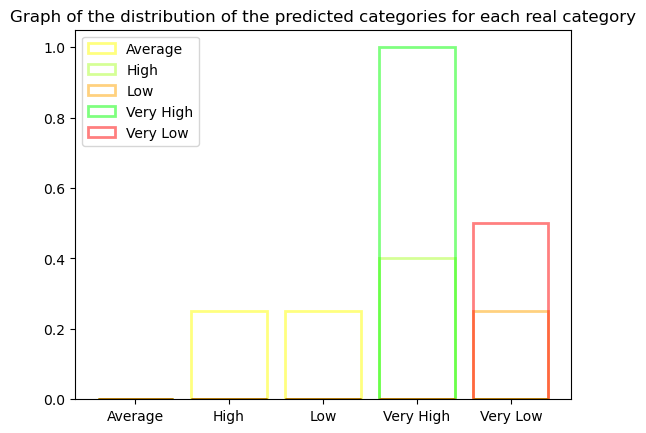

In [15]:
import numpy as np
from sklearn.metrics import classification_report
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
#Simple classification report
report = classification_report(y_test, prediction_labels)
print("Classification Report:\n", report)

#Distribution study
#Add labels
labels = y_test.columns
prediction_labels = pd.DataFrame(data=prediction_labels, columns=labels)

#Create a color set
colors = ["#FFFF00","#ADFF2F","#FFA500","#00FF00","#FF0000"]
#Represent the plot of the predicted values for each of the real values with different colors
for i,label in enumerate(labels): #itereaate over lables
    indices = y_test.index[y_test[label] == 1].tolist() #extract all the indices of the correct label
    total = y_test.loc[indices].sum().sum() #calculate the total number of values for this label
    #extract the predicted values for this sub-sample and see the proportion of each categories
    prediction_labels_sub = prediction_labels.loc[indices].sum()/total 
    #represent it's distribution
    plt.bar(prediction_labels_sub.index, prediction_labels_sub.values, edgecolor=colors[i], facecolor="none", label=label, linewidth=2, alpha = 0.5)
plt.legend()
plt.title("Graph of the distribution of the predicted categories for each real category")
plt.show()

Some correct prediction for extremes, far fewer good results for average or close to average categories.

## 5. Repeat submission process to improve place on leaderboard


It may be usefull to make more change as the model still has a hard time with close to average classes, and there may be room to improve it. However to do so there is a need to automatically scan the results for a good range of parameters values.

In [16]:
# Submit a third model using GridSearchCV
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
t0 = time.time()
param_grid = {
    "n_estimators": np.arange(20, 101, 10), #Num of trees, not too much as we don't have a lot of data
    "max_depth": np.arange(5, 21, 5), #Max depth to limit to prevent overfitting
    "min_samples_split": np.arange(2, 9, 2),#Min num of samples to split a node
    "min_samples_leaf": np.arange(1,9,2),#Min num of samples in leaves
}

gridmodel = GridSearchCV(
    estimator=RandomForestClassifier(random_state=46, class_weight = "balanced"), #we keep the same randomness seed for reproductibility
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation as the default one
    scoring='accuracy',#we use the same scoring metric
    n_jobs=-1 #We use all processors
)

#use model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))
t1 = time.time()
print(f"{(t1-t0)/60:.2f} min of calculation")

best mean cross-validation score: 0.521
best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 70}
1.89 min of calculation


Accuracy of the model: 0.32
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         4
           3       0.50      1.00      0.67         2
           4       0.60      0.75      0.67         4

   micro avg       0.50      0.32      0.39        19
   macro avg       0.29      0.39      0.32        19
weighted avg       0.27      0.32      0.28        19
 samples avg       0.32      0.32      0.32        19



C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


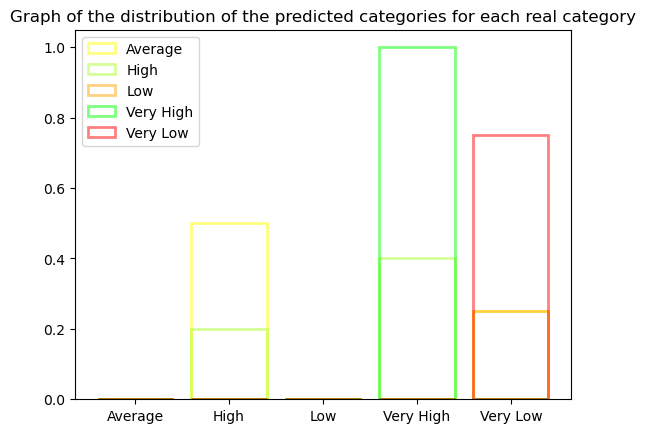

In [17]:
#Submit new Model :

#-- Generate predicted values
y_pred = gridmodel.best_estimator_.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
accuracy = accuracy_score(y_test, y_pred) #https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
print(f"Accuracy of the model: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

#Add labels
labels = y_test.columns
prediction_labels = pd.DataFrame(data=y_pred, columns=labels)

#Histograms
#Create a color set
colors = ["#FFFF00","#ADFF2F","#FFA500","#00FF00","#FF0000"]
#Represent the plot of the predicted values for each of the real values with different colors
for i,label in enumerate(labels): #itereaate over lables
    indices = y_test.index[y_test[label] == 1].tolist() #extract all the indices of the correct label
    total = y_test.loc[indices].sum().sum() #calculate the total number of values for this label
    #extract the predicted values for this sub-sample and see the proportion of each categories
    prediction_labels_sub = prediction_labels.loc[indices].sum()/total 
    #represent it's distribution
    plt.bar(prediction_labels_sub.index, prediction_labels_sub.values, edgecolor=colors[i], facecolor="none", label=label, linewidth=2, alpha = 0.5)
plt.legend()
plt.title("Graph of the distribution of the predicted categories for each real category")
plt.show()

It didn't worked that well. Maybe we can't do much better with a Random Forst Classifier.

In [18]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm

#creating a dic of all the models
models = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(kernel = "linear", C=1),
    "BaggingClassifier": BaggingClassifier(base_estimator=SVC(), random_state=46),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=46)
}

#creating a dic of all the parameters dic assiciated to the models
param_grids = {
    "KNeighborsClassifier": {"n_neighbors": np.arange(2,15,3)},
    "SVC": {'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.001, 0.01, 0.1, 1]}, 
    "BaggingClassifier": {"n_estimators": np.arange(5,100,10)},
    "GradientBoostingClassifier": {"n_estimators": np.arange(20,150,10),
                                  "learning_rate": np.arange(0.05, 0.2, 0.05),
                                  "max_depth": np.arange(2,7,2)}
}

#Training the models with a grid method
gridmodels = {}
for name, model in tqdm(models.items()):
    gridmodel = GridSearchCV(
    estimator = models[name],
    param_grid = param_grids[name],
    cv=5, # 5-fold cross-validation as the default one
    scoring='accuracy',#we use the same scoring metric
    n_jobs=-1 #We use all processors
    )
    if name == "KNeighborsClassifier":
        gridmodel.fit(preprocessor(X_train), y_train)
    else : #we convert our One-hot encoding to a list of labels
        y_train_labels = np.argmax(y_train, axis=1)
        gridmodel.fit(preprocessor(X_train), y_train_labels)
    gridmodels[name] = gridmodel

 50%|██████████████████████████████████████████                                          | 2/4 [00:01<00:01,  1.63it/s]C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:57<00:00, 59.47s/it]


In [19]:
#-- Generate predicted values
results = {}
for name, gridmodel in gridmodels.items():
    if name == "KNeighborsClassifier":
        y_pred = gridmodel.predict(preprocessor(X_test))
    else:
        y_pred = gridmodel.predict(preprocessor(X_test))
        y_pred = np.eye(5)[y_pred]
    ## Write code to show model performance by comparing prediction_labels with true labels
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {
        "Best_Params": gridmodel.best_params_,
        "Best_Score": gridmodel.best_score_,
        "Test_Accuracy": accuracy,
        "Class_Report": report
    }
    
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Best Parameters: {metrics['Best_Params']}")
    print(f"  Best Cross-validation Score: {metrics['Best_Score']:.3f}")
    print(f"  Test Set Accuracy: {metrics['Test_Accuracy']:.3f}")
    print(f"  Classification report:")
    print(metrics['Class_Report'])
print(y_test.columns)

Model: KNeighborsClassifier
  Best Parameters: {'n_neighbors': 5}
  Best Cross-validation Score: 0.623
  Test Set Accuracy: 0.421
  Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.40      0.40      0.40         5
           2       0.50      0.25      0.33         4
           3       0.67      1.00      0.80         2
           4       0.75      0.75      0.75         4

   micro avg       0.53      0.42      0.47        19
   macro avg       0.46      0.48      0.46        19
weighted avg       0.44      0.42      0.42        19
 samples avg       0.42      0.42      0.42        19

Model: SVC
  Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  Best Cross-validation Score: 0.711
  Test Set Accuracy: 0.632
  Classification report:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.60      0.6

C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


All the parameters used are printed on the result of the previous cell. To find them we used a grid approach testing different sets of parameters with GridSearchCV(). Overall, the results are better than with the RandomForestClassifier, rising to an accuracy of 0.63 for the SVC model with very good performances to recognise "Low" happiness, good results for the other classes to except the average class with only a precision of 0.33.

# 6. Basic Deep Learning

In [20]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#count features in input data
feature_count= preprocessor(X_train).shape[1]
num_classes=5

## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,)),# Input layer
    Activation('relu'),
    Dense(64),# Hidden layer 1
    Activation('relu'),
    Dense(64),# Hidden layer 2
    Activation('relu'),
    Dense(32),# Hidden layer 3
    Activation('relu'),
    Dense(num_classes),# Output layer
    Activation('softmax'),
])

#Use Softmax activation in last layer. How many neurons should there be in the last layer?

keras_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4352      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)               

In [21]:
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
km = keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)


Epoch 1/300


3/3 [==============================] - 2s 237ms/step - loss: 1.5699 - accuracy: 0.2157 - val_loss: 1.5808 - val_accuracy: 0.3889
Epoch 2/300
3/3 [==============================] - 0s 40ms/step - loss: 1.5552 - accuracy: 0.2353 - val_loss: 1.5733 - val_accuracy: 0.3889
Epoch 3/300
3/3 [==============================] - 0s 39ms/step - loss: 1.5400 - accuracy: 0.2549 - val_loss: 1.5670 - val_accuracy: 0.4444
Epoch 4/300
3/3 [==============================] - 0s 41ms/step - loss: 1.5277 - accuracy: 0.2745 - val_loss: 1.5618 - val_accuracy: 0.4444
Epoch 5/300
3/3 [==============================] - 0s 37ms/step - loss: 1.5155 - accuracy: 0.3922 - val_loss: 1.5565 - val_accuracy: 0.4444
Epoch 6/300
3/3 [==============================] - 0s 35ms/step - loss: 1.4999 - accuracy: 0.4902 - val_loss: 1.5518 - val_accuracy: 0.4444
Epoch 7/300
3/3 [==============================] - 0s 33ms/step - loss: 1.4877 - accuracy: 0.5098 - val_loss: 1.5471 - val_accuracy: 0.4444
Epoch 8/300
3/3 

3/3 [==============================] - 0s 39ms/step - loss: 0.9624 - accuracy: 0.6667 - val_loss: 1.2498 - val_accuracy: 0.5000
Epoch 55/300
3/3 [==============================] - 0s 36ms/step - loss: 0.9528 - accuracy: 0.6667 - val_loss: 1.2444 - val_accuracy: 0.5000
Epoch 56/300
3/3 [==============================] - 0s 37ms/step - loss: 0.9458 - accuracy: 0.6667 - val_loss: 1.2369 - val_accuracy: 0.5000
Epoch 57/300
3/3 [==============================] - 0s 42ms/step - loss: 0.9375 - accuracy: 0.6667 - val_loss: 1.2305 - val_accuracy: 0.5000
Epoch 58/300
3/3 [==============================] - 0s 35ms/step - loss: 0.9303 - accuracy: 0.6667 - val_loss: 1.2268 - val_accuracy: 0.5000
Epoch 59/300
3/3 [==============================] - 0s 32ms/step - loss: 0.9233 - accuracy: 0.6667 - val_loss: 1.2251 - val_accuracy: 0.5000
Epoch 60/300
3/3 [==============================] - 0s 31ms/step - loss: 0.9152 - accuracy: 0.6471 - val_loss: 1.2168 - val_accuracy: 0.5000
Epoch 61/300
3/3 [========

3/3 [==============================] - 0s 36ms/step - loss: 0.6120 - accuracy: 0.8235 - val_loss: 1.0587 - val_accuracy: 0.5000
Epoch 113/300
3/3 [==============================] - 0s 31ms/step - loss: 0.6050 - accuracy: 0.8431 - val_loss: 1.0547 - val_accuracy: 0.5000
Epoch 114/300
3/3 [==============================] - 0s 34ms/step - loss: 0.6008 - accuracy: 0.8431 - val_loss: 1.0517 - val_accuracy: 0.5000
Epoch 115/300
3/3 [==============================] - 0s 34ms/step - loss: 0.5946 - accuracy: 0.8431 - val_loss: 1.0510 - val_accuracy: 0.5000
Epoch 116/300
3/3 [==============================] - 0s 37ms/step - loss: 0.5912 - accuracy: 0.8824 - val_loss: 1.0504 - val_accuracy: 0.5000
Epoch 117/300
3/3 [==============================] - 0s 37ms/step - loss: 0.5850 - accuracy: 0.8627 - val_loss: 1.0474 - val_accuracy: 0.5000
Epoch 118/300
3/3 [==============================] - 0s 35ms/step - loss: 0.5800 - accuracy: 0.8627 - val_loss: 1.0452 - val_accuracy: 0.5000
Epoch 119/300
3/3 [=

Epoch 170/300
3/3 [==============================] - 0s 31ms/step - loss: 0.3434 - accuracy: 0.9608 - val_loss: 1.0252 - val_accuracy: 0.5556
Epoch 171/300
3/3 [==============================] - 0s 35ms/step - loss: 0.3403 - accuracy: 0.9608 - val_loss: 1.0227 - val_accuracy: 0.5556
Epoch 172/300
3/3 [==============================] - 0s 36ms/step - loss: 0.3355 - accuracy: 0.9608 - val_loss: 1.0284 - val_accuracy: 0.5556
Epoch 173/300
3/3 [==============================] - 0s 37ms/step - loss: 0.3317 - accuracy: 0.9608 - val_loss: 1.0321 - val_accuracy: 0.5556
Epoch 174/300
3/3 [==============================] - 0s 54ms/step - loss: 0.3289 - accuracy: 0.9608 - val_loss: 1.0417 - val_accuracy: 0.5000
Epoch 175/300
3/3 [==============================] - 0s 49ms/step - loss: 0.3259 - accuracy: 0.9608 - val_loss: 1.0427 - val_accuracy: 0.5556
Epoch 176/300
3/3 [==============================] - 0s 34ms/step - loss: 0.3220 - accuracy: 0.9804 - val_loss: 1.0417 - val_accuracy: 0.5000
Epoch 

Epoch 228/300
3/3 [==============================] - 0s 31ms/step - loss: 0.1655 - accuracy: 1.0000 - val_loss: 1.1098 - val_accuracy: 0.6111
Epoch 229/300
3/3 [==============================] - 0s 25ms/step - loss: 0.1631 - accuracy: 1.0000 - val_loss: 1.1144 - val_accuracy: 0.6111
Epoch 230/300
3/3 [==============================] - 0s 34ms/step - loss: 0.1620 - accuracy: 1.0000 - val_loss: 1.1079 - val_accuracy: 0.6111
Epoch 231/300
3/3 [==============================] - 0s 46ms/step - loss: 0.1584 - accuracy: 1.0000 - val_loss: 1.1122 - val_accuracy: 0.6111
Epoch 232/300
3/3 [==============================] - 0s 27ms/step - loss: 0.1569 - accuracy: 1.0000 - val_loss: 1.1111 - val_accuracy: 0.6111
Epoch 233/300
3/3 [==============================] - 0s 31ms/step - loss: 0.1543 - accuracy: 1.0000 - val_loss: 1.1175 - val_accuracy: 0.6111
Epoch 234/300
3/3 [==============================] - 0s 33ms/step - loss: 0.1530 - accuracy: 1.0000 - val_loss: 1.1243 - val_accuracy: 0.6111
Epoch 

Epoch 286/300
3/3 [==============================] - 0s 30ms/step - loss: 0.0808 - accuracy: 1.0000 - val_loss: 1.2349 - val_accuracy: 0.6111
Epoch 287/300
3/3 [==============================] - 0s 30ms/step - loss: 0.0799 - accuracy: 1.0000 - val_loss: 1.2385 - val_accuracy: 0.6111
Epoch 288/300
3/3 [==============================] - 0s 31ms/step - loss: 0.0790 - accuracy: 1.0000 - val_loss: 1.2443 - val_accuracy: 0.6111
Epoch 289/300
3/3 [==============================] - 0s 29ms/step - loss: 0.0786 - accuracy: 1.0000 - val_loss: 1.2469 - val_accuracy: 0.6111
Epoch 290/300
3/3 [==============================] - 0s 31ms/step - loss: 0.0772 - accuracy: 1.0000 - val_loss: 1.2516 - val_accuracy: 0.6111
Epoch 291/300
3/3 [==============================] - 0s 33ms/step - loss: 0.0766 - accuracy: 1.0000 - val_loss: 1.2478 - val_accuracy: 0.6111
Epoch 292/300
3/3 [==============================] - 0s 33ms/step - loss: 0.0756 - accuracy: 1.0000 - val_loss: 1.2504 - val_accuracy: 0.6111
Epoch 

In the middle layers we used the rectified linear unit ("relu") activation function. It return the input if it is positive, and 0 if the input is negative. 

Softmax is used in the last layer because we want to classify into 5 categories our countries based on the data we have on them. Having softmax used for the output layer do just that, by puting all the weight of a result on one of the output neurons, thus equivalent to a class. This is also why we have 5 neurons in the last layer.

The validation loss keeps increasing after 150 epochs, revealing a possible overfitting of or model. Thus, we should train less and keep the number of apoch arounf 150 to avoid overfitting.

categorical_crossentropy  measures the dissimilarity between the true distribution (the actual labels) and the predicted distribution (the model's outputs). It is  adapted to evalutate a classifier like ours using a softmax activation function with one-hot encoded output, so we would keep it. 

The "sdg" or Stochastic gradient Descent optimizer is known in Numerical Methods to be a simple way to efficiently converge and get reduce the loss. Other more advanced optimizer exist but they are not needed in our simple case.

**Model training history**

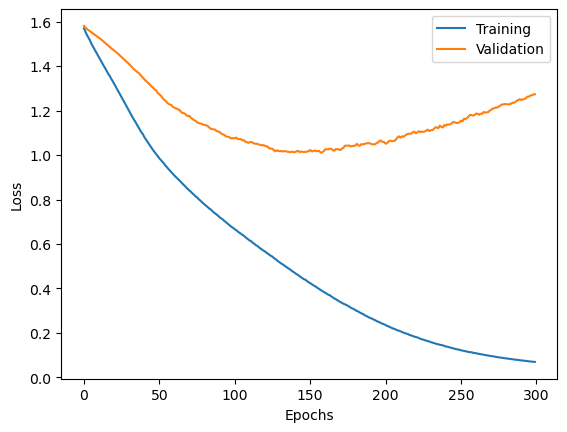

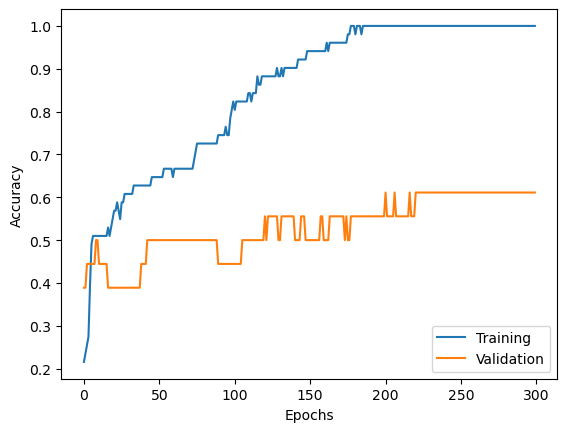

In [22]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(km.history['loss'])
plt.plot(km.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(km.history['accuracy'])
plt.plot(km.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [23]:
#-- Generate predicted y values
y_pred_prob = keras_model.predict(preprocessor(X_test))

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index= np.argmax(y_pred_prob, axis=1) # Predict

# extract correct prediction labels
prediction_labels = [y_test.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels
y_test_labels = y_test.idxmax(axis=1)
accuracy = accuracy_score(y_test_labels, prediction_labels)
print(f"Accuracy of the Keras model: {accuracy:.4f}")

report = classification_report(y_test_labels, prediction_labels)
print("Classification Report:\n", report)

1/1 [==============================] - 0s 288ms/step
Accuracy of the Keras model: 0.4737
Classification Report:
               precision    recall  f1-score   support

     Average       0.00      0.00      0.00         4
        High       0.50      0.40      0.44         5
         Low       0.50      0.50      0.50         4
   Very High       0.50      1.00      0.67         2
    Very Low       0.60      0.75      0.67         4

    accuracy                           0.47        19
   macro avg       0.42      0.53      0.46        19
weighted avg       0.42      0.47      0.43        19



The results are correct in view of the previous models, though particularly bad for the "Average" class. 

We have tried many different architectures and number of epochs, and none of those improve the model. Adding more layers doesn't change much of the result, removing one drops the accuracy. Reducing the number of epochs reduces the accuracy on the test set too, despite signs of overfitting, and increasing it definitely overfit the model. Overall, we didn't find ways to compensate for the very bad results of the "Average" class, introducing weights based on the frequency of categories in the training dataset would be a good way to solve this issue.>

### Interpretation of the results

In [24]:
import shap

explainer = shap.DeepExplainer(keras_model, preprocessor(X_train))

# compute SHAP values for the test set
shap_values = explainer.shap_values(preprocessor(X_test))

C:\Users\mathi\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\mathi\anaconda3\Lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [25]:
# Average the absolute SHAP values across all instances for each feature
shap_values_combined = np.abs(shap_values[0])  # Use shap_values[0] for the first class (0 for binary classification)
mean_shap_values = np.mean(shap_values_combined, axis=1)  # Change axis=0 to axis=1

print(mean_shap_values.shape)  # This should now show the correct shape

(33,)


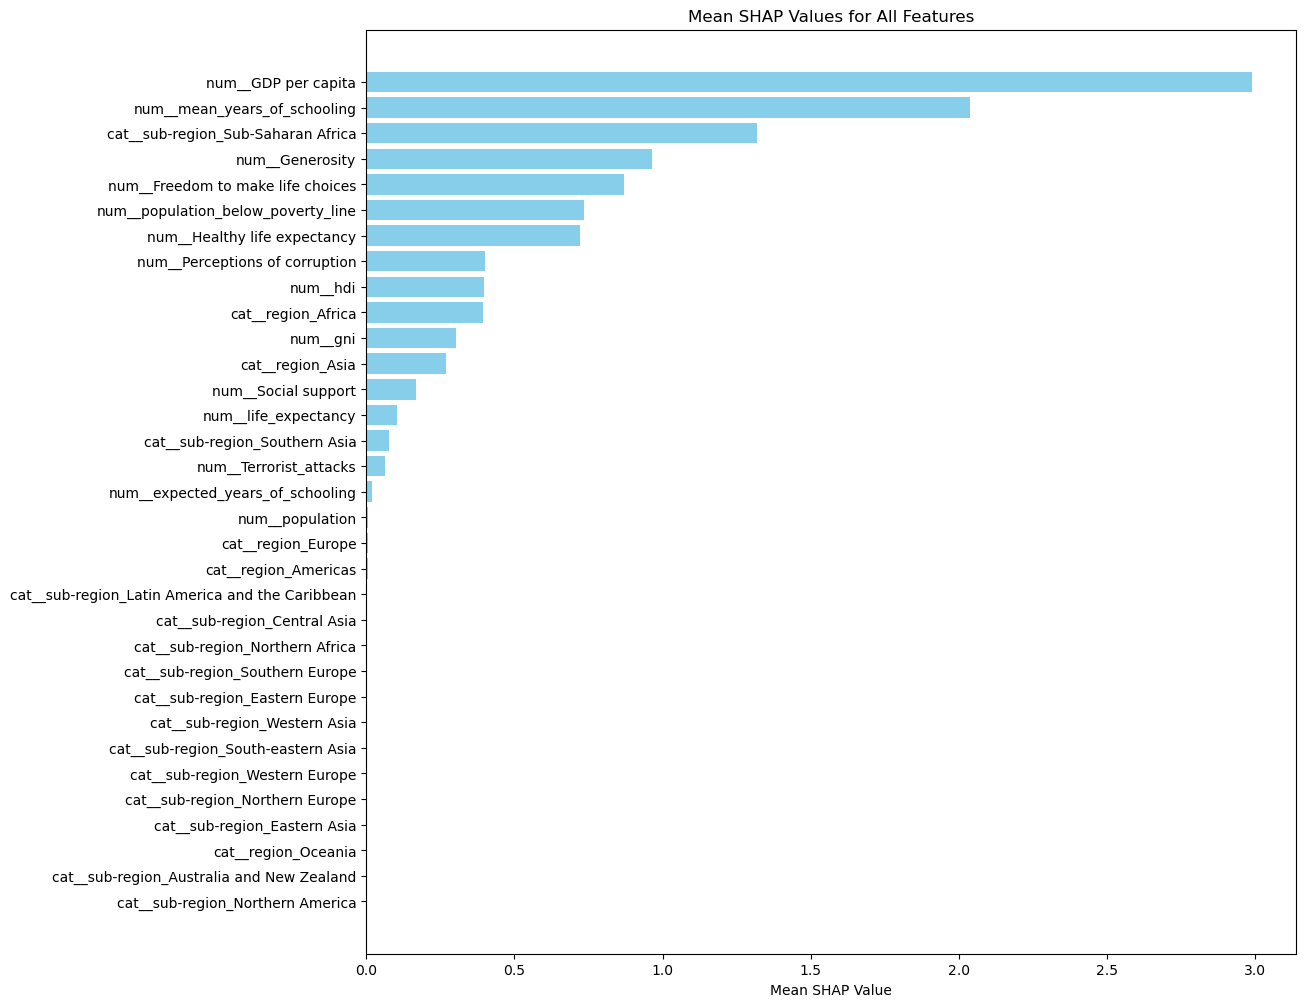

In [26]:
columns = preprocess.get_feature_names_out()

# Create a DataFrame for easier plotting
shap_df = pd.DataFrame({
    'Feature': columns,
    'Mean SHAP Value': mean_shap_values
})

# Sort the DataFrame by Mean SHAP Value
shap_df = shap_df.sort_values(by='Mean SHAP Value', ascending=True)

# Plot the final bar plot
plt.figure(figsize=(12, 12))
plt.barh(shap_df['Feature'], shap_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.title('Mean SHAP Values for All Features')
plt.show()

Shap allows for some interpretability of the resuts. We can see which entry parameters are the most influent but doesn't give a lot more. It can be seen as insuficient, for instance we don't see how the different parameters interacts, and what could be a key combination of features.